In [32]:
# The objective is to make the equation equivalent to Propertycrime=α+Population+Population2+Murder+Robbery

import math
import warnings

from IPython.display import display
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import scipy
import seaborn as sns
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:3f}'.format

# Suppress warnings
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

# Bring in data
df = pd.read_csv("table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv")
# Pick the fourth row as the header
df.columns = df.iloc[3]
# Rename column headers to make it easier to work with
df.columns = ['city', 'population', 'violent', 'murder', 'r_1', 'r_2', 'robbery', 'assault', 'property', 'burglary', 'larceny', 'motor', 'arson', 'empty']
# Remove the any lines that are empty in Population column.
df.dropna(subset=['population'], inplace=True)
# Remove another line filled with wrong data
df.drop(df.index[0], inplace=True)

In [33]:
# Remove columns that will not be added to the equation.
df = df.drop(columns=['city', 'violent', 'r_1', 'r_2', 'property', 'burglary', 'larceny', 'motor', 'arson', 'empty'])

# Make definition to remove commas from strings
def replace(column):
    df[column] = df[column].str.replace(',', '')
    
replace('population')
replace('murder')
replace('robbery')
replace('assault')

# Convert type to integers
print(df.head())

  population murder robbery assault
4       1861      0       0       0
5       2577      0       0       3
6       2846      0       0       3
7      97956      8     227     526
8       6388      0       4      16


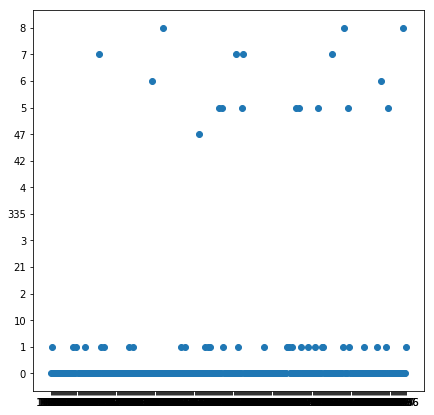

In [34]:
# Change variables so any values greater than 0 is coded as 1
# And any values equal to 0 are coded as 0.
# first check for anamolies
plt.figure(figsize=(7, 7))
plt.scatter(x=df['population'], y=df['murder'])
plt.show()

In [35]:
# Convert to integer
df.population = df.population.astype(int)
df.murder = df.murder.astype(int)
df.robbery = df.robbery.astype(int)
df.assault = df.assault.astype(int)
df

print(df[:10])

    population  murder  robbery  assault
4         1861       0        0        0
5         2577       0        0        3
6         2846       0        0        3
7        97956       8      227      526
8         6388       0        4       16
9         4089       0        3        2
10        1781       0        0        3
11      118296       1       31       68
12        9519       0        4        3
13       18182       0       12       18


In [36]:
# Change variables so any values greater than 0 is coded as 1
# And any values equal to 0 are coded as 0.
#print(df.loc[df['murder'] > 0])
#df['robbery'].replace(to_replace=df.loc[df['robbery'] > 0], value='1', inplace=True)
#df['robbery'] = df['robbery'].map({227: 1, 0: 0})
df['murder'][df['murder'] > 0] = 1
df['robbery'][df['robbery'] > 0] = 1
df['assault'][df['assault'] > 0] = 1
df.head()

,population,murder,robbery,assault
4,1861,0,0,0
5,2577,0,0,1
6,2846,0,0,1
7,97956,1,1,1
8,6388,0,1,1


Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

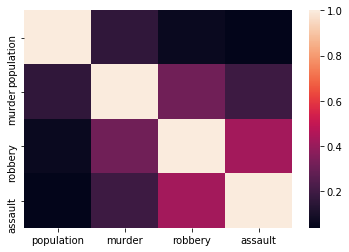

In [37]:
# Plot regression
sns.heatmap(df.corr())
plt.show()

In [39]:
# Instantiate
regr = linear_model.LinearRegression()
Y = df['population'].values.reshape(-1, 1)
X = df[['assault', 'robbery', 'murder']]
regr.fit(X, Y)

# Check the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  2707.45662353  12876.98405933 203428.19857375]]

Intercept: 
 [1466.44205072]

R-squared:
0.0265514928384899


It looks like the correlation betweent the data is not high at all, since the R-squared is very low.